In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.reset()

In [2]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [3]:
x, theta, eta, drs, dy10, dy20 = sp.symbols ('x theta eta drs dy10 dy20')

In [4]:
phi0 = x
dphi = x*(sp.sqrt( 1 - eta*sp.cos(2*(theta))) - 1)

In [5]:
Delta = drs**2 - (1/x * sp.diff(dphi, theta) - dy10*sp.cos(theta) + dy20*sp.cos(theta) )**2
#en realidad de Deltaa**2

In [6]:
dx1 = 1/(1-sp.diff(sp.diff(phi0, x), x))*(   sp.diff(dphi, x) + 
                                         dy10*sp.cos(theta) + dy20*sp.sin(theta) + sp.sqrt(Delta))

In [7]:
dx2 = 1/(1-sp.diff(sp.diff(phi0, x), x))*(   sp.diff(dphi, x) + 
                                         dy10*sp.cos(theta) + dy20*sp.sin(theta) - sp.sqrt(Delta))

In [8]:
dx1.subs([ (x,1) , (eta,0.15) , (dy10,0.09), (dy20,0), (drs,0.07) ])

0.15*sqrt(0.217777777777778 - (-0.6*cos(theta) + sin(2*theta)/sqrt(1 - 0.15*cos(2*theta)))**2) + sqrt(1 - 0.15*cos(2*theta)) + 0.09*cos(theta) - 1

In [9]:
thetaa = np.linspace(0,2*np.pi,12000)

In [10]:
z = 1
etaa = 0.15
drss = 0.07

In [11]:
f1 = sp.lambdify(theta, dx1.subs([ (x,z) , (eta,etaa) , (dy10,0), (dy20,0.09), (drs,drss) ]) )

In [12]:
f2 = sp.lambdify(theta, dx2.subs([ (x,z) , (eta,etaa) , (dy10,0), (dy20,0.09), (drs,drss) ]) )

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.15*sqrt(0.217777777777778 - (0.6*cos(theta) + sin(2*theta)/sqrt(1 - 0.15*cos(2*theta)))**2) + sqrt(1 - 0.15*cos(2*theta)) + 0.09*sin(theta) - 1)
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-0.15*sqrt(0.217777777777778 - (0.6*cos(theta) + sin(2*theta)/sqrt(1 - 0.15*cos(2*theta)))**2) + sqrt(1 - 0.15*cos(2*theta)) + 0.09*sin(theta) - 1)


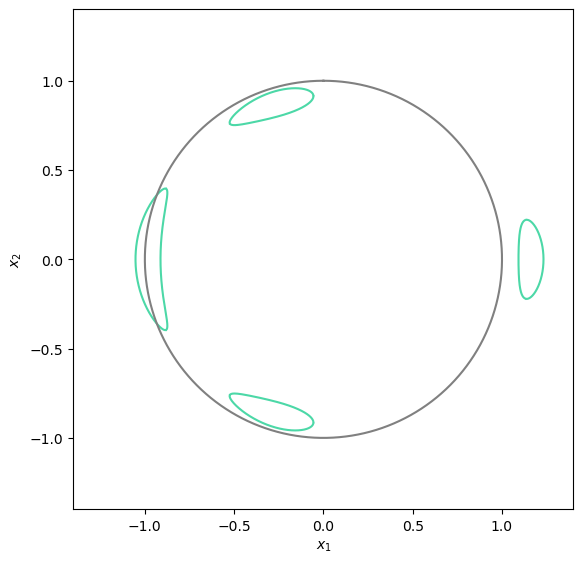

In [13]:
plt.plot((z + f1(thetaa))*np.sin(thetaa), 
         (z + f1(thetaa))*np.cos(thetaa), marker = '' , markersize=5 , color = '#4cd8a7')
plt.plot((z + f2(thetaa))*np.sin(thetaa), 
         (z + f2(thetaa))*np.cos(thetaa), marker = '' , markersize=5 , color = '#4cd8a7')
plt.plot(z*np.sin(thetaa), z*np.cos(thetaa), marker = '' , markersize=5 , color = 'grey')
plt.axis([-1.4, 1.4,-1.4, 1.4])
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
set_size(5,5)
plt.show()

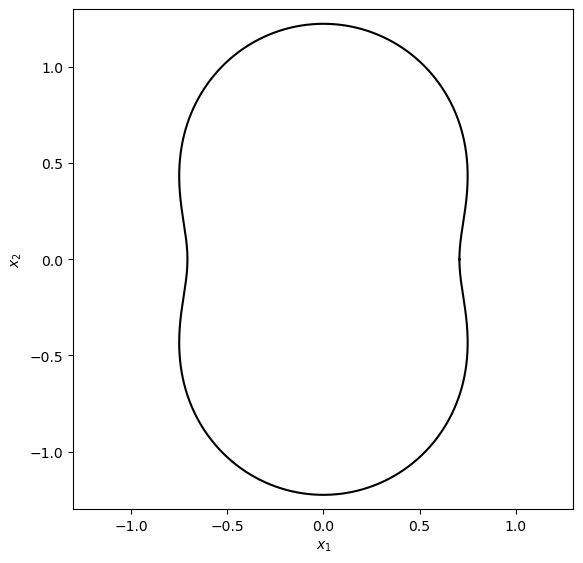

In [14]:
eeta = 0.5
plt.plot( np.sqrt(1 - eeta*np.cos(2*thetaa)) *np.cos(thetaa),
         np.sqrt(1 - eeta*np.cos(2*thetaa)) *np.sin(thetaa) , marker = '' , markersize=5 , color = 'black')
plt.axis([-1.3, 1.3,-1.3, 1.3])
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
set_size(5,5)
plt.show()

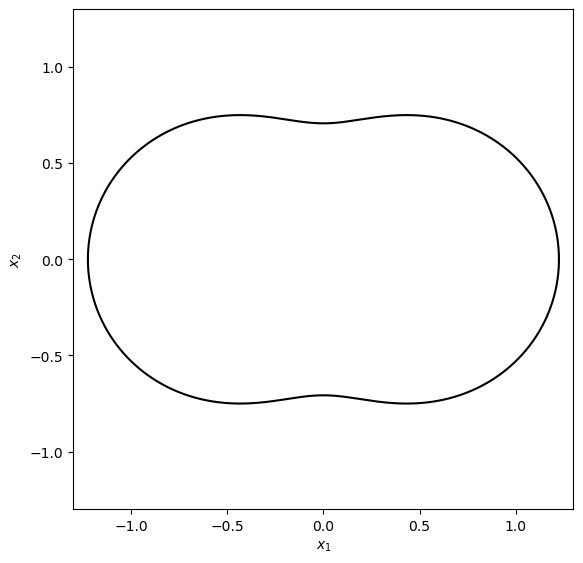

In [15]:
eeta = 0.5
plt.plot( np.sqrt(1 - eeta*np.cos(2*thetaa-np.pi)) *np.cos(thetaa),
         np.sqrt(1 - eeta*np.cos(2*thetaa-np.pi)) *np.sin(thetaa) , marker = '' , markersize=5 , color = 'black')
plt.axis([-1.3, 1.3,-1.3, 1.3])
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
set_size(5,5)
plt.show()

In [16]:
def lente(z,etaa,drss,dy100,dy200):
    f1 = sp.lambdify(theta, dx1.subs([ (x,z) , (eta,etaa) , (dy10,dy100), (dy20,dy200), (drs,drss) ]) )
    f2 = sp.lambdify(theta, dx2.subs([ (x,z) , (eta,etaa) , (dy10,dy100), (dy20,dy200), (drs,drss) ]) )
    plt.plot((z + f1(thetaa))*np.sin(thetaa), 
             (z + f1(thetaa))*np.cos(thetaa), marker = '' , markersize=5 , color = '#4cd8a7')
    plt.plot((z + f2(thetaa))*np.sin(thetaa), 
             (z + f2(thetaa))*np.cos(thetaa), marker = '' , markersize=5 , color = '#4cd8a7')
    plt.plot(z*np.sin(thetaa), z*np.cos(thetaa), marker = '' , markersize=5 , color = 'grey')
    plt.plot(-dy200+drss*np.sin(thetaa), dy100+drss*np.cos(thetaa), marker = '' , markersize=5 , color = 'grey')
    plt.axis([-(1.3+.4), 1.3+.4,-(1.3+.4), 1.3+.4])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.text(1, 1, 'r = '+"{:.{}g}".format( z, 3 )+'\n$\eta$ = '+"{:.{}g}".format( etaa, 3 )+'\n$dr_{s}$ = '+"{:.{}g}".format( drss, 3 )+'\n$dy_{10}$ = '+ "{:.{}g}".format( dy100, 3 )+'\n$dy_{20}$ = '+ "{:.{}g}".format( dy200, 3 )
            )
    plt.axhline(0, linestyle='-',lw =0.5 ,color='grey') # horizontal lines
    plt.axvline(0, linestyle='-',lw =0.5, color='grey') # vertical lines
    set_size(5,5)

<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.15*sqrt(0.217777777777778 - (0.6*cos(theta) + sin(2*theta)/sqrt(1 - 0.15*cos(2*theta)))**2) + sqrt(1 - 0.15*cos(2*theta)) + 0.09*sin(theta) - 1)
<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-0.15*sqrt(0.217777777777778 - (0.6*cos(theta) + sin(2*theta)/sqrt(1 - 0.15*cos(2*theta)))**2) + sqrt(1 - 0.15*cos(2*theta)) + 0.09*sin(theta) - 1)


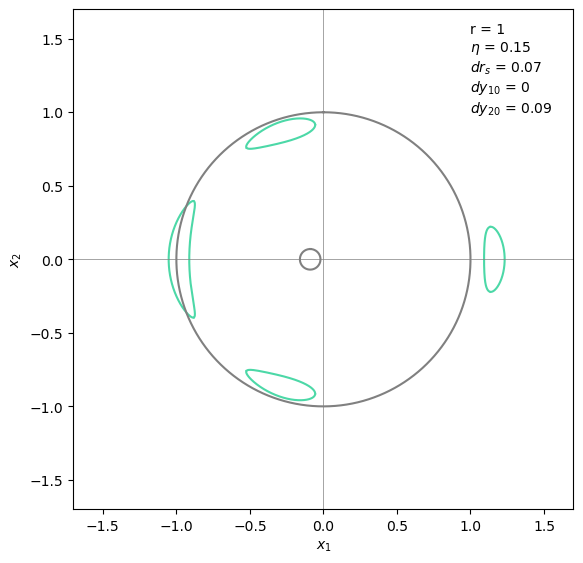

In [17]:
lente(1,0.15,0.07,0,0.09)
plt.show()

In [18]:
lente(1,0.15,0.07,0,0.09)
plt.savefig('/home/tomi/Documentos/Fisica/Tesis/Python/Animation/i.png' , dpi = 300)

<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.15*sqrt(0.217777777777778 - (0.6*cos(theta) + sin(2*theta)/sqrt(1 - 0.15*cos(2*theta)))**2) + sqrt(1 - 0.15*cos(2*theta)) + 0.09*sin(theta) - 1)
<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-0.15*sqrt(0.217777777777778 - (0.6*cos(theta) + sin(2*theta)/sqrt(1 - 0.15*cos(2*theta)))**2) + sqrt(1 - 0.15*cos(2*theta)) + 0.09*sin(theta) - 1)


In [19]:
s = np.linspace(0.15,0.01,100)
#for i in range(0,100):
#    plt.clf()
#    lente(1,s[i],0.07,0,0.09)
#    plt.savefig('/home/tomi/Documentos/Fisica/Tesis/Python/Animation/'+str(i)+'.png' , dpi = 300)